In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_raw  = pd.read_csv("heart.csv")
data = data_raw.copy()

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.replace({"Age":0,"RestingBP":0,"Cholesterol":0,"MaxHR":0},np.nan, inplace=True)

In [4]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
data_categotical = data.select_dtypes("object")
data_numeric = data.select_dtypes(["float64","int64"]).iloc[:,:-1]
data_label = data.iloc[:,-1].values

In [7]:
data_numeric

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140.0,289.0,0,172,0.0
1,49,160.0,180.0,0,156,1.0
2,37,130.0,283.0,0,98,0.0
3,48,138.0,214.0,0,108,1.5
4,54,150.0,195.0,0,122,0.0
...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2
914,68,144.0,193.0,1,141,3.4
915,57,130.0,131.0,0,115,1.2
916,57,130.0,236.0,0,174,0.0


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_enc = LabelEncoder()

In [10]:
data_categotical = data_categotical.apply(label_enc.fit_transform)

In [11]:
data_categotical.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [ ]:
# seperate fields wth 2 type as a binary categorical field
data_categotical.nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
data_categotical_bin = data_categotical[["Sex","ExerciseAngina"]]

In [15]:
ohe_enc = OneHotEncoder()

In [16]:
data_ohe = ohe_enc.fit_transform(data_categotical[["ChestPainType","RestingECG","ST_Slope"]].values).toarray()

In [17]:
data_ohe.shape

(918, 10)

In [18]:
type(data_categotical_bin.values)

numpy.ndarray

In [19]:
data = np.concatenate([data_numeric.values,data_categotical_bin.values,data_ohe],axis = 1)

In [20]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,40.0,140.0,289.0,0.0,172.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49.0,160.0,180.0,0.0,156.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,130.0,283.0,0.0,98.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48.0,138.0,214.0,0.0,108.0,1.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54.0,150.0,195.0,0.0,122.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,110.0,264.0,0.0,132.0,1.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68.0,144.0,193.0,1.0,141.0,3.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57.0,130.0,131.0,0.0,115.0,1.2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
916,57.0,130.0,236.0,0.0,174.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
from sklearn.impute import KNNImputer

In [22]:
imputer = KNNImputer(n_neighbors=3)
data = imputer.fit_transform(data)

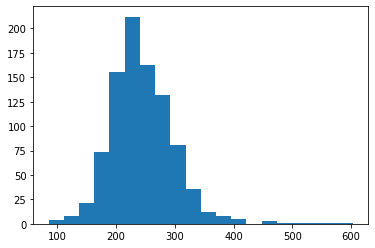

In [23]:
plt.hist(data[:,2],bins = 20)
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)